## The Wonderful World of ML - Session 2 Assignment

Two of my favorite and most highly recommended references for machine learning are:  

- [An Introduction to Statistical Learning with Applications in R - James, Witten, Hastie, and Tibshirani](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/ISLR%20Seventh%20Printing.pdf)
- [The Elements of Statistical Learning - Hastie, Tibshirani and Friedman](https://github.com/MichaelSzczepaniak/WonderfulML/raw/master/docs/TheElementsOfStatisticalLearning_Hastie_Tibshirani_Friedman_print10.pdf)

Pdf versions of both of these books have been uploaded to the repo and can be downloaded using the links under each title.  If you are relatively new to the area of machine learning, the first reference will be your friend.  If you are an experienced pro, have great math skills and/or need more depth on a particular topic, the second reference is an excellent reference.  I will refer to the first reference as the **ISL** and the second as the **ESL** throughout the rest of this series.

1) If you haven't done so by now, install jupyter notebook and configure it with an R kernel if you are an R user.  If you are Python user, your Anaconda install will have Python configured out of the box.

*Python users -* If you have installed the [latest version of Anaconda](https://www.continuum.io/downloads), you should have jupyter notebook as part of this install.  If you have a distribution of Python which doesn't include jupyter, you can do a **pip** install as described [here](http://jupyter.readthedocs.io/en/latest/install.html).  

*R users -*  Because jupyter runs on Python, you will also need to install a Python distribution if you don't have one installed on your system already.  I recommend installing the [latest version of Anaconda](https://www.continuum.io/downloads) if you don't have a compelling reason not to use this distribution because it comes with jupyter as mentioned earlier.

After Python and jupyter, I recommend that both R and Python users configure jupyter with an R kerenel.  I followed the [instructions described in this video](https://www.youtube.com/watch?v=I9a9Jj2A95g) and used [this reference](https://irkernel.github.io/installation/) as I went through the process.

2) What was the cost function Sondra mentioned that is used for linear regression?

**Answer: **  The residual sum of squares:

$$\sum_{i=1}^n(h_{\theta}(x_i) - y_i)^2$$

3) Equation (3.3) of the ISL defines the **Residual Sum of Squares** which can be written more generally as:

$$
RSS = \sum_{n=1}^N (\mathbf{t}_n - \mathbf{x}_n^T\mathbf{w})^2
    = \sum_{n=1}^N (\mathbf{t}_n - \mathbf{x}_n^T\mathbf{w})(\mathbf{t}_n - \mathbf{x}_n^T\mathbf{w})^T
$$

where $\mathbf{t}_n$ is referred to as the target vector for the the *n*th sample.  Some texts refer to the target as $y$...

For simple linear regression, we only have a single target $t$ and a single predictor $x$.  If we substitute $y$ for $t$, $b$ for the intercept parameter $\hat{\beta_0}$ and $m$ for the slope parameter $\hat{\beta_1}$, the above equation simplifies to:

$$
RSS = \sum_{n=1}^N (y_n - (mx_n + b))^2
$$

If I define the arrays $\mathbf{x}$ and $\mathbf{y}$ as:

$$
  \mathbf{x} =
  \begin{bmatrix}
    5 \\ 10 \\ 15 \\ 20
  \end{bmatrix}\quad
  \mathbf{y} =
  \begin{bmatrix}
    5.5 \\ 6.5 \\ 10.5 \\ 9.5
  \end{bmatrix}
$$

Create 3 plots on a single chart of $RSS$ on the y axis and the slope $m$ on the x axis for three values of b: 1, 3, and 5.  The code in the next block will get you started.

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"Warning message in sqrt(sum.squares/one.delta):
"NaNs produced"Warning message in stats::qt(level/2 + 0.5, pred$df):
"NaNs produced"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"Warning message in sqrt(sum.squares/one.delta):
"NaNs produced"Warning message in stats::qt(level/2 + 0.5, pred$df):
"NaNs produced"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"Chernobyl! trL>n 6"Warning message in sqrt(sum.squares/one.delta):
"NaNs produced"Warning messa

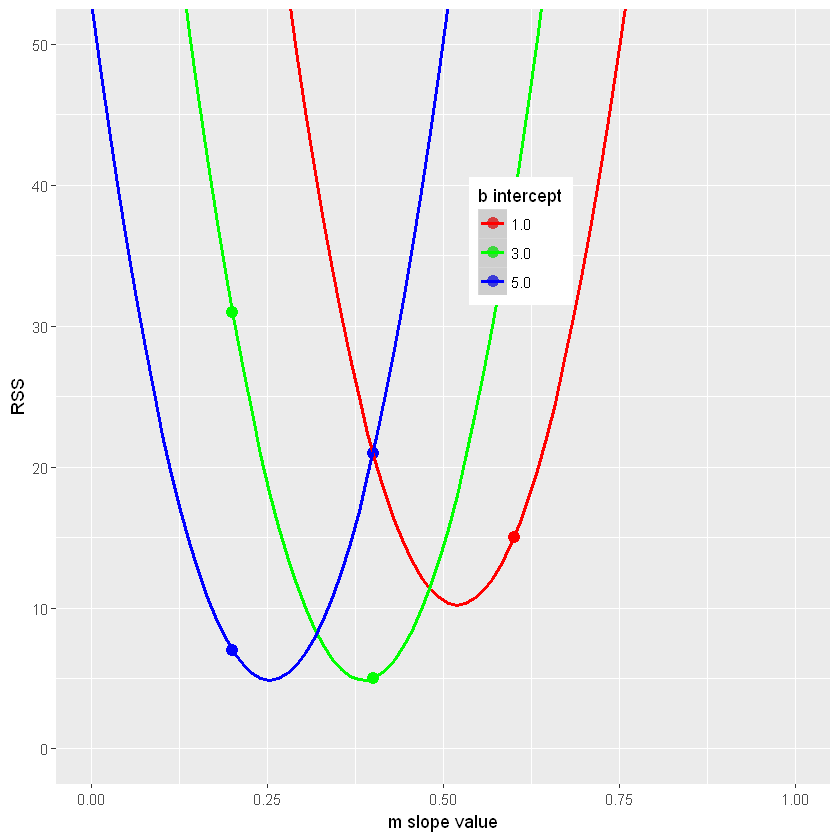

In [25]:
x <- seq(5, 20, 5)
y <- c(5.5, 6.5, 10.5, 9.5)
m_vals <- seq(0, 1, 0.2)
b_vals <- seq(1, 5, 2)

linearSquareResidual <- function(targets, features, m, b) {
    yhat <- (m * features) + b
    sqr_res <- (targets - yhat)**2
    return(sqr_res)
}

# Remove next line if correct values are being produced. Next line is just a check.
#list(x, y, m_vals, b_vals, linearSquareResidual(y, x, 0.4, 3))  # squared residuals = {0.25,  0.25,  2.25,  2.25}

getLinRssVals <- function(y_vec, x_vec, m_vec, b_vec) {
    rss_vals <- c()
    for(j in 1:length(b_vec)) {
        rss_m <- c()
        for(i in 1: length(m_vec)) {
            rss_m <- c(rss_m, 
                       sum(linearSquareResidual(y_vec, x_vec, m_vec[i], b_vec[j])))
        }
        rss_vals <- c(rss_vals, rss_m)
    }
    
    return(rss_vals)
}

df <- data.frame(m_slope=rep(m_vals, length(b_vals)),
                 rss=getLinRssVals(y, x, m_vals, b_vals),
                 b_inter=factor(rep(b_vals, each=length(m_vals))))

suppressMessages(suppressWarnings(library(dplyr)))
suppressMessages(suppressWarnings(library(ggplot2)))
library(dplyr)
library(ggplot2)

p <- ggplot(df, aes(x=m_slope, y=rss, color=factor(b_inter)))
p <- p + geom_point(size = 3)
p <- p + geom_smooth(method = "loess")
p <- p + scale_color_manual(name="b intercept", values=c("red", "green", "blue"),
                            labels=c("1.0","3.0","5.0"))
p <- p + labs(x="m slope value", y="RSS")
p <- p + theme(legend.position=c(0.6,0.7))
p <- p + coord_cartesian(ylim = c(0, 50)) 
print(p)


Based on the plots you just built, what are the best values for **m** and **b** that fit this data?

**Answer: ** green curve at m ~ 0.4, b = 3 and blue curve at m ~ 0.25, b = 5 have very similar minima

4) You are thinking about using logistic regression to determine if your stock trading has a chance of making you some money.  You design your own signal variable x which you derive from data that is readily available and use it to back-test your model on historical data.  You simulate a trade for various values of x and assign a value of 1 if the trade made money and a 0 if it lost money.  You plot your data, fit a sigmoid function through the data, and it looks like this:

<img src="https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/docs/graphics/logistic_reg_stock_example.jpg">

What is the main assumption we are making in terms of how we are modeling this data?  **HINT:** What quantity are we assuming can be modeled as a line?

**Answer: **  From page 132 of the ISL, we are assuming that the probability of a winning trade can be modeled as a sigmoid function which implies that the **natural log of the odds ratio** $\ln{\bigg(\frac{p(x)}{1 - p(x)}\bigg)}$ is linear (see equation 4.4).

5) You were excited to learn about K-Means clustering from Sondra's presentation and decided to give it a try.  You first run an analyis in using R and get one result which looks reasonable.  You then try run the same analysis in Python and again get results which look reasonable, but these results are substantially different from the results you obtained using R.

Why do think you might have gotten different results on the same dataset?

**Answer: ** The K-means algorithm is sensitive to the starting conditions your use (see ISL pages 388 and 389)

6) The day after Sondra's presentation, you are having lunch with your colleague Chris who is working on helping a client who runs a large data center detect when servers may be are risk of failing.  You are excited to learn that Chris is using anomaly detection to characterize the servers in the client's datacenter and ask her what her model looks like.

Chris invites you over to her desk to show you two contour plots of probability density vs. two variables.  The two variables in the first plot she calls x1 and x2 and the plot looks like this:

<img src="https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/docs/graphics/circular_contours1.jpg">

She than shows you another contour plot of probability density vs. two different variable x3 and x4 which looks like this:

<img src="https://raw.githubusercontent.com/MichaelSzczepaniak/WonderfulML/master/docs/graphics/eliptical_contours1.jpg">

What do these plots suggest about the relationship between x1 and x2 vs. the relationship between x3 and x4?

**Answer: ** The variables x1 and x2 are independent which means the off-diagonal terms of the corvariance matrix $\sum_k$ in equation 4.8 in the ESL are all zero.  The variables x3 and x4 appear to have some dependence which means the off-diagonal terms of the corvariance matrix $\sum_k$ in equation 4.8 in the ESL are non-zero.

We'll see this equation again when we explore Linear and Quadratic Discriminant Analysis (LDA and QDA).